## Summary of Factor Analysis: 

Factor analysis is one of the unsupervised machine learning algorithms which is used for dimensionality reduction for Mixed Data. Since our data is mixed, I conducted Factor Analysis. This algorithm creates factors from the observed variables to represent the common variance i.e. variance due to correlation among the observed variables.

We found that our model can be reduced to 7 factors, which in total explains 29.36% of the total variance. However, that is a low number, so we will proceed with using all the variable in the model. 

In [4]:
#pip install factor_analyzer

In [71]:
from sklearn.cluster import DBSCAN
import pandas as pd
from sklearn.preprocessing import StandardScaler
#% matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prince import FAMD
import pprint
from factor_analyzer import FactorAnalyzer

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [80]:
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


#### Prepare

Removed the outliers, standard scaled the data and also the features have to be numeric.

In [81]:
scaler = StandardScaler()
# transform data
df
df = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,-0.402355,1.153688,1.165254,0.196922,1.757936,1.120927,-0.205637,-0.322458,-1.762814,-1.316872,0.482087,-0.244014,0.226863,-0.303173,2.329121,1.998592,1.233999,2.223615,-0.887021,0.316900,-1.065595,-1.474487
1,-0.402355,-0.866785,-0.858182,-5.078164,-0.511806,1.120927,-0.205637,-0.322458,0.567275,-1.316872,-2.074316,-0.244014,-4.407954,3.298445,0.457294,-0.429630,-0.486592,-0.449718,-0.887021,-0.337933,0.963272,-2.440138
2,-0.402355,1.153688,1.165254,0.196922,-0.057858,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,-2.074316,-0.244014,0.226863,3.298445,2.329121,3.617407,2.954590,2.223615,-0.887021,0.316900,-1.065595,0.939638
3,-0.402355,1.153688,-0.858182,0.196922,-0.209174,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,-0.244014,0.226863,-0.303173,-0.478619,-0.429630,-0.486592,-0.449718,-0.887021,0.971733,-2.080028,-0.026012
4,-0.402355,1.153688,1.165254,0.196922,-0.663122,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,-0.244014,0.226863,-0.303173,-0.478619,-0.024926,-0.486592,-0.449718,-0.887021,0.971733,-0.051162,-0.991662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,-0.402355,1.153688,1.165254,0.196922,2.514516,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,0.482087,-0.244014,0.226863,-0.303173,0.457294,-0.429630,0.086938,-0.449718,1.127369,-0.992766,0.963272,0.456813
253676,2.485367,1.153688,1.165254,0.196922,-1.571019,-0.892119,-0.205637,-0.322458,-1.762814,-1.316872,-2.074316,-0.244014,0.226863,-0.303173,1.393207,-0.429630,-0.486592,2.223615,-0.887021,0.971733,-3.094461,-0.991662
253677,-0.402355,-0.866785,-0.858182,0.196922,-0.057858,-0.892119,-0.205637,-0.322458,0.567275,0.759375,-2.074316,-0.244014,0.226863,-0.303173,-1.414532,-0.429630,-0.486592,-0.449718,-0.887021,-1.975015,-0.051162,-1.957312
253678,-0.402355,1.153688,-0.858182,0.196922,-0.814438,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,0.482087,-0.244014,0.226863,-0.303173,0.457294,-0.429630,-0.486592,-0.449718,1.127369,-0.337933,-0.051162,-2.440138


In [74]:
df.shape

(253680, 22)

In [75]:
# ValueError: All variables are quantitative: PCA should be used

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

#### BARTLETT’S TEST OF SPHERICITY

In [82]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(720709.6590924889, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, so we can conclude that correlation is present among the variables which is a green signal to apply factor analysis.

#### KAISER-MEYER-OLKIN (KMO) TEST

In [83]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [84]:
kmo_model

0.8087086713801657

The overall KMO for our data is 0.81, which mean there is an overall proportion of variance of 0.81.Our data has more correlation and dimensionality reduction techniques such as the factor analysis can be applied.

#### DETERMINING THE NUMBER OF FACTORS

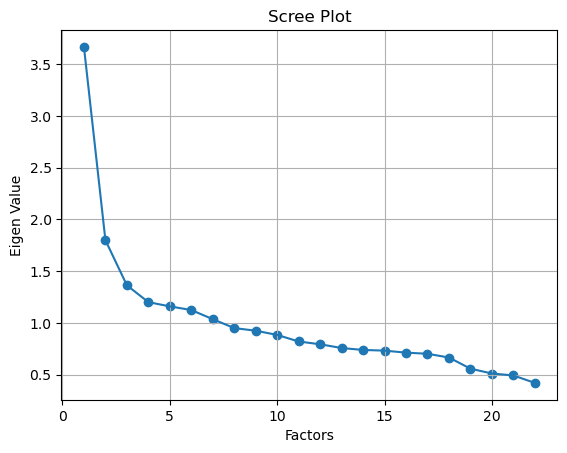

In [85]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=df.shape[1])
fa.fit(df)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

In [86]:
ev

array([3.66653309, 1.79872601, 1.36271937, 1.20007811, 1.15924769,
       1.12380535, 1.03553264, 0.94948332, 0.92410984, 0.88343125,
       0.8198539 , 0.79297096, 0.7567284 , 0.73818122, 0.73167228,
       0.71203802, 0.70126171, 0.66478234, 0.55718188, 0.51047511,
       0.49171154, 0.419476  ])

Here, we see only for 7-factors eigenvalues are greater than one. It means we need to choose only 7 factors (or unobserved variables). 

### INTERPRETING THE FACTORS

In [87]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

#### LOADINGS

The loading score will range from -1 to 1.Values close to -1 or 1 indicate that the factor has an influence on these variables. Values close to 0 indicates that the factor has a lower influencer on the variable.

In [88]:
fa = FactorAnalyzer()
fa.set_params(n_factors= 7, rotation='varimax')
fa.fit(df)
print(pd.DataFrame(fa.loadings_,index=df.columns))

                             0         1         2         3         4  \
Diabetes_binary       0.141039  0.408774 -0.066786  0.178519  0.026570   
HighBP                0.075157  0.548665 -0.129477  0.221103  0.119976   
HighChol              0.060834  0.367343 -0.053585  0.208239  0.115614   
CholCheck             0.025933  0.122917 -0.002603  0.021346  0.180025   
BMI                   0.162954  0.456261  0.042622 -0.097924 -0.087145   
Smoker                0.096691  0.067794 -0.086488  0.172914 -0.054751   
Stroke                0.136683  0.062071 -0.059273  0.300762  0.013426   
HeartDiseaseorAttack  0.120491  0.167113 -0.014146  0.498874  0.012348   
PhysActivity         -0.254746 -0.137774  0.178866 -0.038580 -0.017886   
Fruits               -0.049855 -0.040428 -0.009207  0.021592  0.048541   
Veggies              -0.046332 -0.022610  0.110568 -0.043440  0.003547   
HvyAlcoholConsump    -0.001200 -0.041113  0.050579 -0.061254 -0.028888   
AnyHealthcare         0.010353  0.0110

#### VARIANCE

The amount of variance explained by each factor can be found out using the ‘get_factor_variance’ function.

In [92]:
x = pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])

In [93]:
x

,0,1,2,3,4,5,6
Variance,1.693816,1.157970,0.964879,0.863301,0.753119,0.714961,0.311606
Proportional Var,0.076992,0.052635,0.043858,0.039241,0.034233,0.032498,0.014164
Cumulative Var,0.076992,0.129627,0.173485,0.212726,0.246958,0.279457,0.293620


In [95]:
x[0]

1.6938159424666916

In [103]:
x.iloc[2]

0    0.076992
1    0.129627
2    0.173485
3    0.212726
4    0.246958
5    0.279457
6    0.293620
Name: Cumulative Var, dtype: float64

In our case, the 7 factors together are able to explain 29.36% of the total variance.

In [107]:
var_exp = x.iloc[1].tolist()

In [108]:
cum_sum_exp = x.iloc[2].tolist()

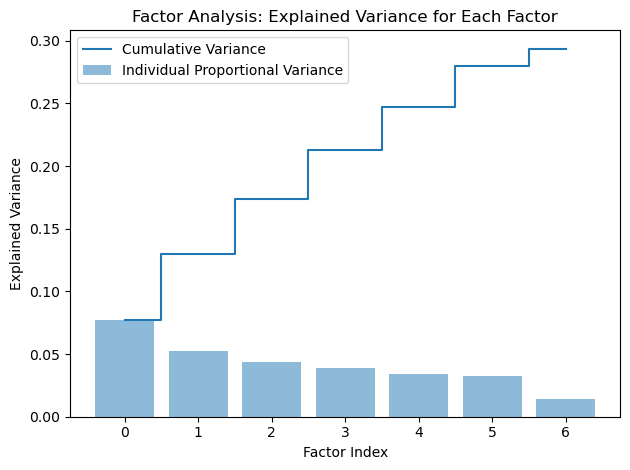

In [111]:
import matplotlib.pyplot as plt
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual Proportional Variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative Variance')
plt.ylabel('Explained Variance')
plt.xlabel('Factor Index')
plt.title('Factor Analysis: Explained Variance for Each Factor')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### COMMUNALITIES

Communality is the proportion of each variable’s variance that can be explained by the factors. Rotations don’t have any influence over the communality of the variables.

In [90]:
print(pd.DataFrame(fa.get_communalities(),index=df.columns,columns=['Communalities']))

                      Communalities
Diabetes_binary            0.235657
HighBP                     0.399349
HighChol                   0.215208
CholCheck                  0.051100
BMI                        0.305869
Smoker                     0.169989
Stroke                     0.117628
HeartDiseaseorAttack       0.292699
PhysActivity               0.179057
Fruits                     0.272225
Veggies                    0.223803
HvyAlcoholConsump          0.090636
AnyHealthcare              0.220138
NoDocbcCost                0.220290
GenHlth                    0.561193
MentHlth                   0.268545
PhysHlth                   0.582066
DiffWalk                   0.430106
Sex                        0.165284
Age                        0.516730
Education                  0.343065
Income                     0.599014


The proportion of each variable’s variance that is explained by the factors can be inferred from the above. For example, we could consider the variable ‘PhysHlth’ about 58.2% of its variance is explained by all the factors together.